# LGMVIP - Data Analytics

## By- Onkar Kota

## Task 3 - Develop a neural network that can read handwriting

### Importing modules

In [2]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=8c27be6eb4ffc4f936f358add26bd6bb6266e6a18bb3ea377cae304d4b06253a
  Stored in directory: c:\users\onkar\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

In [4]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 8s 1us/step


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
img_index = 5555
print(y_train[img_index])

7


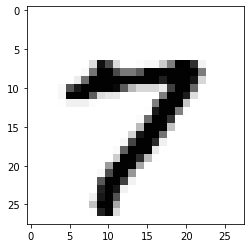

In [8]:
plt.imshow(x_train[img_index], cmap='Greys')

In [9]:
print('Shape of x_train :', x_train.shape)
print('Shape of y_trian :', y_train.shape)

Shape of x_train : (60000, 28, 28)
Shape of y_trian : (60000,)


### Reshaping the array to 4 dimensions so it can work with keras API

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
input_shape = (28,28,1)

### Converting the values to float if they are not

In [11]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

### Normalizing the code by max RGB value 255

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
print('x_train shape :',x_train.shape)

x_train shape : (60000, 28, 28, 1)


In [14]:
print('Number of images in x_train:',x_train.shape[0])
print('Number of images in x_test:',x_test.shape[0])

Number of images in x_train: 60000
Number of images in x_test: 10000


### Importing important keras module and layers

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D

#### Creating Sequential models

In [20]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train, y = y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2074 - accuracy: 0.9380
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0842 - accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0580 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0449 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0354 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0306 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0273 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0214 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0182 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step - l

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0622 - accuracy: 0.9847


[0.0621517151594162, 0.9847000241279602]

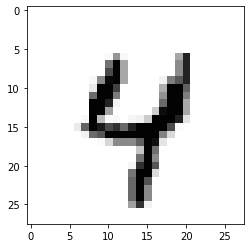

In [29]:
img_index = 1111
plt.imshow(x_test[img_index].reshape(28,28), cmap='Greys')

In [30]:
pred = model.predict(x_test[img_index].reshape(1,28,28,1))
print(pred.argmax())

4


# Thank you!